In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
pd.set_option("display.max_columns", None) # displaying all the columns available in the dataset

df = pd.read_csv('data.csv')

In [3]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## a) Data Cleaning and Preprocessing

### 01) Checking for null values

In [4]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

### 02) Rounding all the float values present inside the dataset into its nearest number

In [5]:
df = df.round()

In [6]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.0,1,0,0,1,1,0,20,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,11.0,1.0,2.0,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.0,1,0,0,0,1,0,19,0,0,6,6,6,14.0,0,0,6,6,6,14.0,0,14.0,-0.0,1.0,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,125.0,1,0,0,0,1,0,19,0,0,6,0,0,0.0,0,0,6,0,0,0.0,0,11.0,1.0,2.0,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,120.0,1,0,0,1,0,0,20,0,0,6,8,6,13.0,0,0,6,10,5,12.0,0,9.0,-1.0,-3.0,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,142.0,0,0,0,1,0,0,45,0,0,6,9,5,12.0,0,0,6,6,6,13.0,0,14.0,-0.0,1.0,Graduate


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

### 03) Converting all the floating values to integer


In [8]:
df[['Admission grade', 'Previous qualification (grade)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']] = df[['Admission grade', 'Previous qualification (grade)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']].astype(np.int64) 

In [9]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122,1,19,12,5,9,127,1,0,0,1,1,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1,2,Dropout
1,1,15,1,9254,1,1,160,1,1,3,3,3,142,1,0,0,0,1,0,19,0,0,6,6,6,14,0,0,6,6,6,14,0,14,0,1,Graduate
2,1,1,5,9070,1,1,122,1,37,37,9,9,125,1,0,0,0,1,0,19,0,0,6,0,0,0,0,0,6,0,0,0,0,11,1,2,Dropout
3,1,17,2,9773,1,1,122,1,38,37,5,3,120,1,0,0,1,0,0,20,0,0,6,8,6,13,0,0,6,10,5,12,0,9,-1,-3,Graduate
4,2,39,1,8014,0,1,100,1,37,38,9,9,142,0,0,0,1,0,0,45,0,0,6,9,5,12,0,0,6,6,6,13,0,14,0,1,Graduate


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Marital status                                  4424 non-null   int64 
 1   Application mode                                4424 non-null   int64 
 2   Application order                               4424 non-null   int64 
 3   Course                                          4424 non-null   int64 
 4   Daytime/evening attendance	                     4424 non-null   int64 
 5   Previous qualification                          4424 non-null   int64 
 6   Previous qualification (grade)                  4424 non-null   int64 
 7   Nacionality                                     4424 non-null   int64 
 8   Mother's qualification                          4424 non-null   int64 
 9   Father's qualification                          4424

### 04) Dropping all those columns which are not required

In [11]:
df = df.drop(columns=['Application mode', 'Application order', 'International', 'Debtor', 'Marital status', 'Displaced', 'Nacionality', 'Father\'s qualification', 'Mother\'s qualification', 'Father\'s occupation', 'Father\'s qualification', 'Mother\'s occupation', 'Mother\'s qualification', 'Unemployment rate', 'Inflation rate', 'GDP'], axis=1)

In [12]:
df.head()

,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Educational special needs,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,171,1,1,122,127,0,1,1,0,20,0,0,0,0,0,0,0,0,0,0,0,0,Dropout
1,9254,1,1,160,142,0,0,1,0,19,0,6,6,6,14,0,0,6,6,6,14,0,Graduate
2,9070,1,1,122,125,0,0,1,0,19,0,6,0,0,0,0,0,6,0,0,0,0,Dropout
3,9773,1,1,122,120,0,1,0,0,20,0,6,8,6,13,0,0,6,10,5,12,0,Graduate
4,8014,0,1,100,142,0,1,0,0,45,0,6,9,5,12,0,0,6,6,6,13,0,Graduate


### 05) Changing 'Dropout' to 0, 'Graduate' to 1 and 'Enrolled' to 2 in 'Target' column

In [13]:
df = df.replace({ 'Target' : { 'Dropout' : 0, 'Graduate' : 1, 'Enrolled' : 2 } })

In [14]:
df.head()

,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Educational special needs,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,171,1,1,122,127,0,1,1,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9254,1,1,160,142,0,0,1,0,19,0,6,6,6,14,0,0,6,6,6,14,0,1
2,9070,1,1,122,125,0,0,1,0,19,0,6,0,0,0,0,0,6,0,0,0,0,0
3,9773,1,1,122,120,0,1,0,0,20,0,6,8,6,13,0,0,6,10,5,12,0,1
4,8014,0,1,100,142,0,1,0,0,45,0,6,9,5,12,0,0,6,6,6,13,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 23 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Course                                          4424 non-null   int64
 1   Daytime/evening attendance	                     4424 non-null   int64
 2   Previous qualification                          4424 non-null   int64
 3   Previous qualification (grade)                  4424 non-null   int64
 4   Admission grade                                 4424 non-null   int64
 5   Educational special needs                       4424 non-null   int64
 6   Tuition fees up to date                         4424 non-null   int64
 7   Gender                                          4424 non-null   int64
 8   Scholarship holder                              4424 non-null   int64
 9   Age at enrollment                               4424 non-null  

## b) Visualizing the dataset

### 1) visulalizing the total number of students dropout, graduate and enrolled 

<Axes: xlabel='Target', ylabel='count'>

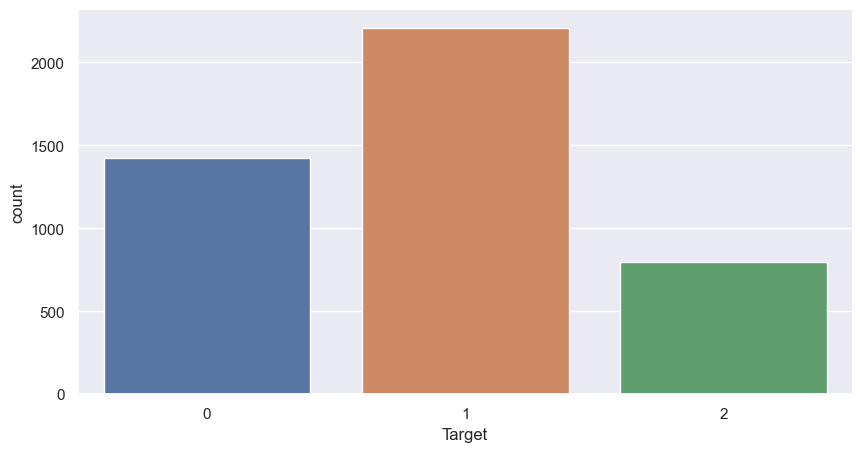

In [16]:
sns.set(rc={'figure.figsize':(10, 5)})

sns.countplot(x=df['Target'])

#### ***In the above graph, in 'Target' axis, 0 --> dropout, 1 --> graduate, 2 --> enrolled***

### 2) Visualizing the total number of students dropout, graduate and enrolled w.r.t Course

<Axes: xlabel='Course', ylabel='count'>

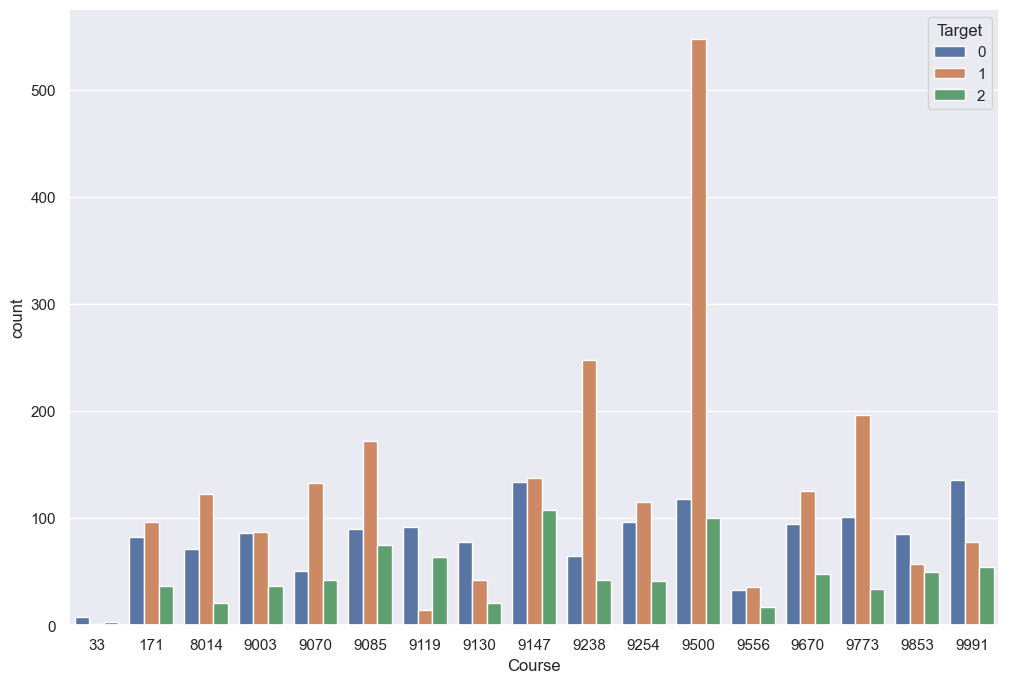

In [17]:
sns.set(rc={'figure.figsize':(12, 8)})

sns.countplot(x=df['Course'], hue=df['Target'])

### 3) Visualizing the total number of students dropout, graduate and enrolled w.r.t attendance

<Axes: xlabel='Daytime/evening attendance\t', ylabel='count'>

C:\Users\Somenath\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\Somenath\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


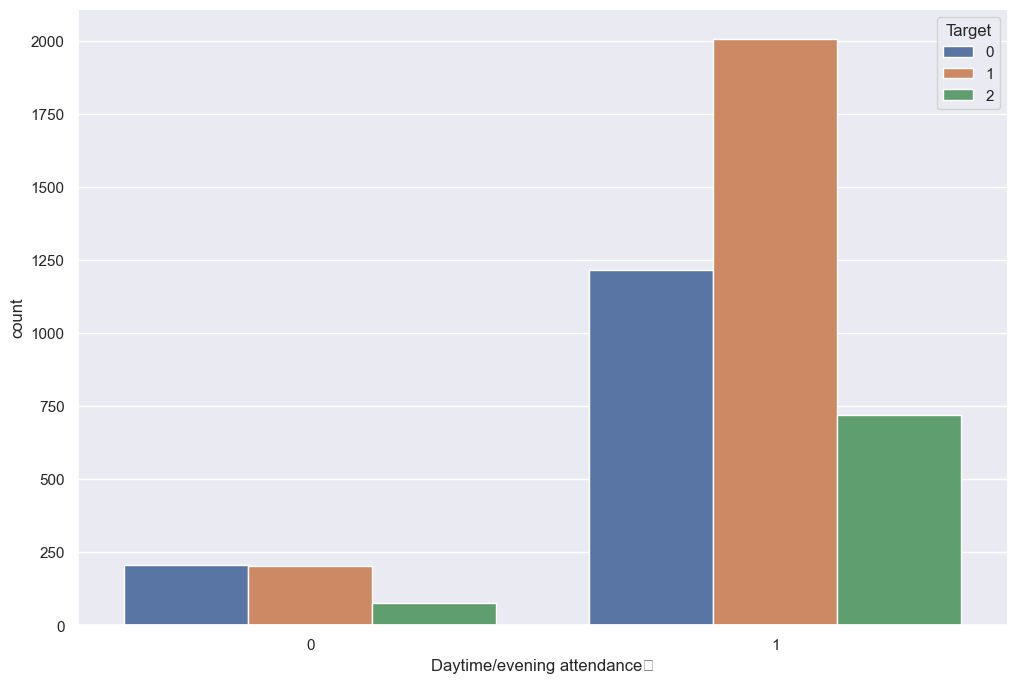

In [18]:
sns.countplot(x=df['Daytime/evening attendance\t'], hue=df['Target'])

#### ***In the above graph, in 'Daytime/evening attendance' axis, 1 --> daytime and 0 --> evening***

### 3) Visualizing the total number of students dropout, graduate and enrolled w.r.t Gender

<Axes: xlabel='Gender', ylabel='count'>

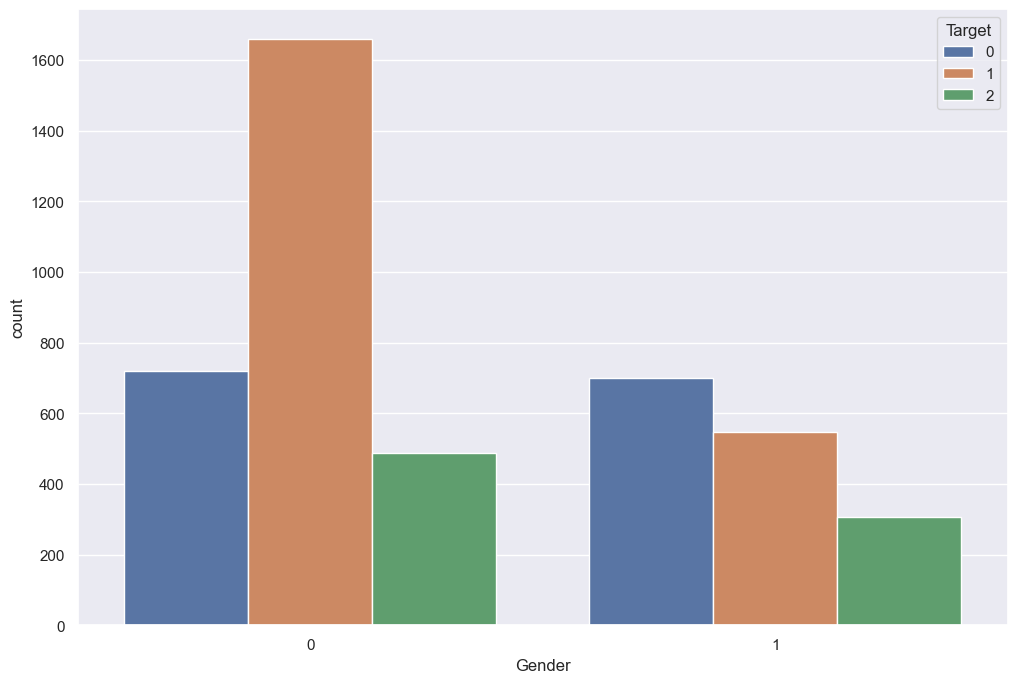

In [19]:
sns.countplot(x=df['Gender'], hue=df['Target'])

#### ***In the above graph, in 'Gender' axis, 1 --> male and 0 --> female***

### 4) Visualizing the total number of students dropout, graduate and enrolled w.r.t Scholarship Holder

<Axes: xlabel='Scholarship holder', ylabel='count'>

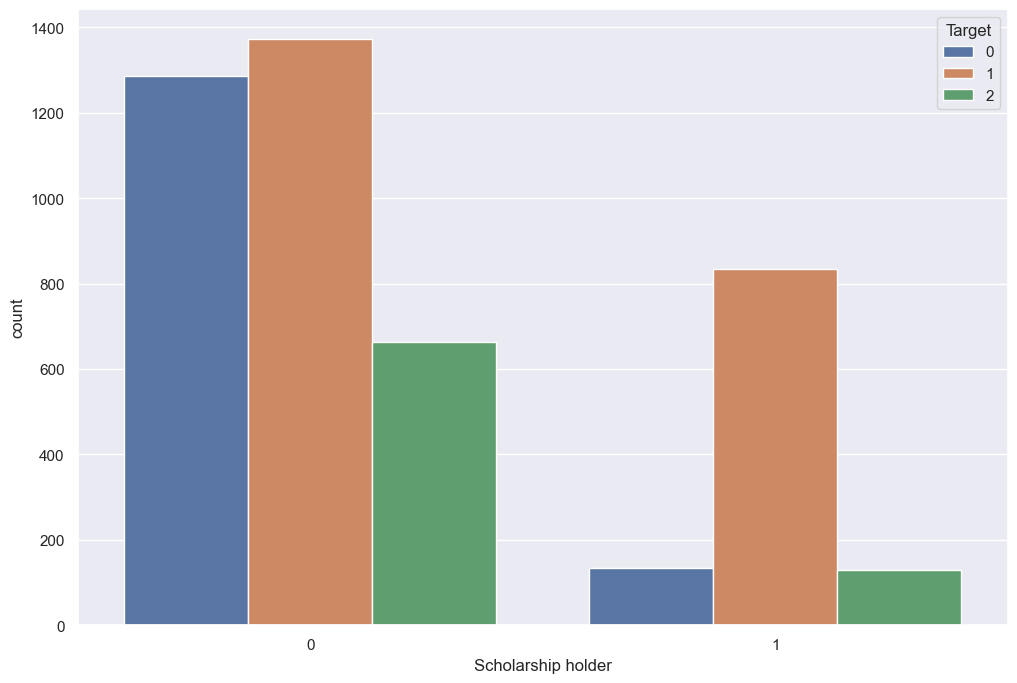

In [20]:
sns.countplot(x=df['Scholarship holder'], hue=df['Target'])

#### ***In the above graph, in 'Scholarship holder' axis, 1 --> a scholarship holder 0 --> not a scholarship holder***

## c) Model Training

### 1) Defining Features and Label

In [21]:
x = df.drop(columns='Target', axis=1) # features

In [22]:
x.head()

,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Educational special needs,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,171,1,1,122,127,0,1,1,0,20,0,0,0,0,0,0,0,0,0,0,0,0
1,9254,1,1,160,142,0,0,1,0,19,0,6,6,6,14,0,0,6,6,6,14,0
2,9070,1,1,122,125,0,0,1,0,19,0,6,0,0,0,0,0,6,0,0,0,0
3,9773,1,1,122,120,0,1,0,0,20,0,6,8,6,13,0,0,6,10,5,12,0
4,8014,0,1,100,142,0,1,0,0,45,0,6,9,5,12,0,0,6,6,6,13,0


In [23]:
y = df['Target'] # label

In [24]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64

### 2) Splitting the data into training data and testing data

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3539, 22), (885, 22), (3539,), (885,))

### 3) Training the model

#### i) Using RandomForestClassifier Model

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
modelRandomForestClassifier = RandomForestClassifier()

In [30]:
modelRandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
X_train_prediction_random_forest = modelRandomForestClassifier.predict(X_train)

In [32]:
trainingAccuracyOfRandomForest = accuracy_score(y_train, X_train_prediction_random_forest)

In [33]:
trainingAccuracyOfRandomForest

1.0

In [34]:
X_test_prediction_random_forest = modelRandomForestClassifier.predict(X_test)

In [35]:
testingAccuracyOfRandomForest = accuracy_score(y_test, X_test_prediction_random_forest)

In [36]:
testingAccuracyOfRandomForest

0.7559322033898305

__*Using Grid Search for Hyperparameter tuning in RandomForestClassifier*__

In [37]:
param_grid_random_forest = {
    'n_estimators': [50, 60, 100, 120, 150],
    'max_depth': [2, 4, 6, 8],
    'max_features': [0.2, 0.6, 1],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

In [38]:
grid_search_random_forest_classifier = GridSearchCV(estimator=modelRandomForestClassifier, param_grid=param_grid_random_forest, cv=5)

In [39]:
grid_search_random_forest_classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [0.2, 0.6, 1],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 60, 100, 120, 150]})

In [40]:
X_train_prediction_random_forest_grid_Search = grid_search_random_forest_classifier.predict(X_train)

In [41]:
trainingAccuracyOfRandomForestGridSearch = accuracy_score(y_train, X_train_prediction_random_forest_grid_Search)

In [42]:
trainingAccuracyOfRandomForestGridSearch

0.8550437976829612

In [43]:
X_test_prediction_random_forest_grid_Search = grid_search_random_forest_classifier.predict(X_test)

In [44]:
testingAccuracyOfRandomForestGridSearch = accuracy_score(y_test, X_test_prediction_random_forest_grid_Search)

In [45]:
testingAccuracyOfRandomForestGridSearch

0.7604519774011299

#### ii) Using DecisionTree Model

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
modelDecisionTree = DecisionTreeClassifier()

In [48]:
modelDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
X_train_prediction_decision_tree = modelDecisionTree.predict(X_train)

In [50]:
trainingAccuracyDecisionTree = accuracy_score(y_train, X_train_prediction_decision_tree)

In [51]:
trainingAccuracyDecisionTree

1.0

In [52]:
X_test_prediction_decision_tree = modelDecisionTree.predict(X_test)

In [53]:
testingAccuracyDecisionTree = accuracy_score(y_test, X_test_prediction_decision_tree)

In [54]:
testingAccuracyDecisionTree

0.6587570621468927

__*Using Grid Search for Hyperparameter tuning in DecisionTreeClassifier*__

In [55]:
param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}


In [56]:
grid_search_decision_tree = GridSearchCV(modelDecisionTree, param_grid=param_grid_decision_tree, cv=5, n_jobs=-1)

In [57]:
grid_search_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 15]})

In [58]:
X_train_prediction_decision_tree_grid_Search = grid_search_decision_tree.predict(X_train)

In [59]:
trainingAccuracyOfDecisionTreeGridSearch = accuracy_score(y_train, X_train_prediction_decision_tree_grid_Search)

In [60]:
trainingAccuracyDecisionTree

1.0

In [61]:
X_test_prediction_decision_tree_grid_Search = grid_search_decision_tree.predict(X_test)

In [62]:
testingAccuracyOfDecisionTreeGridSearch = accuracy_score(y_test, X_test_prediction_decision_tree_grid_Search)

In [63]:
testingAccuracyOfDecisionTreeGridSearch

0.7288135593220338

#### iii) Using Support Vector Machine

In [64]:
from sklearn import svm

In [65]:
modelSVM = svm.SVC()

In [66]:
modelSVM.fit(X_train, y_train)

SVC()

In [67]:
X_train_prediction_svm = modelSVM.predict(X_train)

In [68]:
trainingAccuracySVM = accuracy_score(y_train, X_train_prediction_svm)

In [69]:
trainingAccuracySVM

0.49675049448996894

In [70]:
X_test_prediction_svm = modelSVM.predict(X_test)

In [71]:
testingAccuracySVM = accuracy_score(y_test, X_test_prediction_svm)

In [72]:
testingAccuracySVM

0.5096045197740113

__*Using Grid Search for Hyperparameter tuning in Support Vector Machine*__

In [73]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

In [74]:
grid_search_svm = GridSearchCV(modelSVM, param_grid=param_grid_svm, cv=5)

In [75]:
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']})

In [76]:
X_train_prediction_svm = grid_search_svm.predict(X_train)

In [77]:
trainingAccuracyOfSVMGridSearch = accuracy_score(y_train, X_train_prediction_svm)

In [78]:
trainingAccuracyOfSVMGridSearch

0.7666007346708109

In [79]:
X_test_prediction_svm = grid_search_svm.predict(X_test)

In [80]:
testingAccuracyOfSVMGridSearch = accuracy_score(y_test, X_test_prediction_svm)

In [81]:
testingAccuracyOfSVMGridSearch

0.7615819209039548

## d) Creating a dataframe out of all the accuracy scores of the three models

In [82]:
dataframe_Accuracy_Score_Training = pd.DataFrame({
    'Model Name' : ['Random Forest Classifier', 'Decision Tree', 'SVM'],
    'Training Accuracy': [trainingAccuracyOfRandomForest, trainingAccuracyDecisionTree, trainingAccuracySVM],
    'Training Accuracy(Hyperparameter Tuning)' : [trainingAccuracyOfRandomForestGridSearch, trainingAccuracyOfDecisionTreeGridSearch, trainingAccuracyOfSVMGridSearch]
})

In [83]:
dataframe_Accuracy_Score_Training

,Model Name,Training Accuracy,Training Accuracy(Hyperparameter Tuning)
0,Random Forest Classifier,1.00000,0.855044
1,Decision Tree,1.00000,0.808703
2,SVM,0.49675,0.766601


In [84]:
dataframe_Accuracy_Score_Testing = pd.DataFrame({
    'Model Name' : ['Random Forest Classifier', 'Decision Tree', 'SVM'],
    'Testing Accuracy': [testingAccuracyOfRandomForest, testingAccuracyDecisionTree, testingAccuracySVM],
    'Testing Accuracy(Hyperparameter Tuning)' : [testingAccuracyOfRandomForestGridSearch, testingAccuracyOfDecisionTreeGridSearch, testingAccuracyOfSVMGridSearch]
})

In [85]:
dataframe_Accuracy_Score_Testing

,Model Name,Testing Accuracy,Testing Accuracy(Hyperparameter Tuning)
0,Random Forest Classifier,0.755932,0.760452
1,Decision Tree,0.658757,0.728814
2,SVM,0.509605,0.761582


## e) Conclusion

From the above two tables, it is clear that the best model out of the three is ***RandomForestClassifier*** since its Training Accuracy after 'Hyperparameter Tuning' is around 83% and Testing Accuracy after 'Hyperparameter Tuning' is around 76%

## f) Generating Pickle File of the Ml Model out of the RandomForestClassifier Model

In [86]:
import pickle 

In [87]:
with open('predict_student_dropout_academic_success.pkl', 'wb') as f:
    pickle.dump(grid_search_random_forest_classifier, f)